In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot
import matplotlib

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# reflect an existing database into a new model
base=automap_base()
base.prepare(engine, reflect=True)
# reflect the tables


In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station=base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [11]:
#create the datasets
station_data = pd.read_sql("SELECT * FROM station", conn)
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Climate Analysis

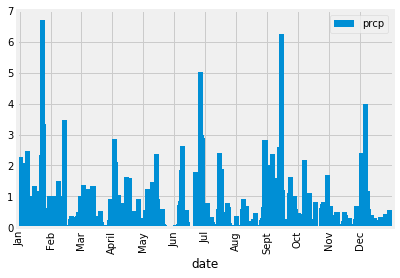

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#--- get the dates
datelist=session.query(measurement.date).\
    order_by(measurement.date).all()

#--------recent
lastdate=(max(datelist))[0]

#--------12 months beforehand
timeobject=datetime.strptime(lastdate, '%Y-%m-%d')
firstdate_obj=(timeobject-timedelta(days=365))
firstdate=str(firstdate_obj).split(" ")[0]

#---get data from those dates
data=session.query(measurement.date, measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", measurement.date) > firstdate,func.strftime("%Y-%m-%d", measurement.date) < lastdate ).all()
rain_data_noin = pd.DataFrame(data)
rain_data = pd.DataFrame(data).set_index("date")
sorted_df=rain_data.sort_values(by=['date'])


# Use Pandas Plotting with Matplotlib to plot the data
#x_values=(1,2,3,4,5,6,7,8,9,10,11,12)
x_labels=("Jan","Feb","Mar","April","May","Jun","Jul", "Aug", "Sept", "Oct", "Nov", "Dec") #this is where the change should be made
ticks=np.arange(2219)
plot=sorted_df.plot(kind="bar", width=30)
plot.locator_params(axis='x', nbins=12)
plot.set_xticklabels(x_labels, rotation=90) #This is where the change should be made
#plot.xticks(label)
#plt.xticks(ticks, x_labels, rotation='vertical')
#plot.set_xticklabels(np.arange(sorted_df["date"]))
plt.show()
#xpos=np.arange(len(sorted_df))
#tick_locations=[value for value in xpos2]
#plt.bar(xpos, sorted_df["prcp"], color='r', alpha=0.5, align="center")

#NOTE: before turning this in, replace the months with the actual dates by selecting 12 evenly spaced dates from the dataframe if possible. First and last date are given.
#also label y value

In [15]:
#datesonly=session.query(measurement.date).\
   # filter(func.strftime("%Y-%m-%d", measurement.date) > firstdate,func.strftime("%Y-%m-%d", measurement.date) < lastdate ).all()
date_list=[]
for date in datelist:
    date_list.append(datetime.strptime(date[0], '%Y-%m-%d'))
#xticks=np.arange(date_list)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean_rain=sorted_df["prcp"].mean()
sd_rain=sorted_df['prcp'].std()
var_rain=sd_rain**2
max_rain=sorted_df["prcp"].max()
min_rain=sorted_df["prcp"].min()
quartile1=sorted_df['prcp'].quantile(q=0.25)
median_rain=sorted_df['prcp'].median()
quartile3=sorted_df['prcp'].quantile(q=0.75)

summary_stats = {
    'Mean':  [mean_rain],
    'SD': [sd_rain],
    'Min': [min_rain],
    'Max': [max_rain],
    'Quartile 1': [quartile1],
    'Quartile 2': [median_rain],
    'Quartile 3':[quartile3]}
summary_df = pd.DataFrame (summary_stats, columns = ['Mean','SD', "Min","Max","Quartile 1", "Quartile 2", "Quartile 3"])
summary_df

,Mean,SD,Min,Max,Quartile 1,Quartile 2,Quartile 3
0,0.176549,0.460667,0.0,6.7,0.0,0.02,0.13


In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = pd.read_sql("SELECT station, count(station) FROM measurement WHERE station NOT NULL GROUP BY station ORDER BY count(station) DESC", conn)
station_totals=pd.DataFrame(station_count)
print(f"There are {len(station_count)} stations in this dataset.")

There are 9 stations in this dataset.


In [130]:
station_count

,station,count(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

max_count=station_count["count(station)"].max()
max_row=station_count.loc[station_count["count(station)"]==max_count]
maxno=str(max_row["station"])
maxno=maxno.split(" ")[4]
maxno=maxno.split("\n")
maxno=maxno[0]
maxno

min_count=station_count["count(station)"].min()
min_row=station_count.loc[station_count["count(station)"]==min_count]
minno=str(min_row["station"])
minno=minno.split(" ")[4]
minno=minno.split("\n")
minno=minno[0]
minno


#new.loc[new["Timepoint"]==timepoints[0]]
#min_count=station_count["count(station)"].min()
print(f"The most active station is {maxno} with {max_count} total measurements.")
print(f"The least active statement is {minno} with {min_count} total measurements.")

The most active station is USC00519281 with 2772 total measurements.
The least active statement is USC00518838 with 511 total measurements.


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
maxstation_df=measurement_data.loc[measurement_data["station"]==maxno]
min_temp=maxstation_df["tobs"].min()
max_temp=maxstation_df["tobs"].max()
avg_temp=maxstation_df["tobs"].mean()

active_stats = {
    'Station': [maxno],
    'Mean':  [avg_temp],
    'Min': [min_temp],
    'Max': [max_temp],}
active_df = pd.DataFrame (active_stats, columns = ['Station','Mean',"Min","Max"])
active_df

,Station,Mean,Min,Max
0,USC00519281,71.663781,54.0,85.0


[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sept'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

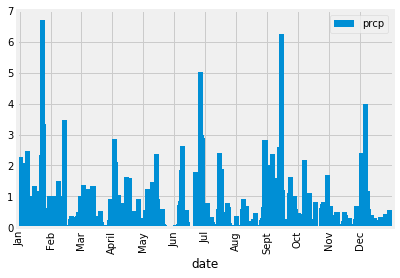

In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempmos=session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(func.strftime("%Y-%m-%d", measurement.date) > firstdate,func.strftime("%Y-%m-%d", measurement.date) < lastdate).all()
tempmos_df = pd.DataFrame(tempmos).set_index("date")
sorted_df=rain_data.sort_values(by=['date'])
tempmos_df=tempmos_df.loc[tempmos_df["station"]==maxno]

x_labels=("Jan","Feb","Mar","April","May","Jun","Jul", "Aug", "Sept", "Oct", "Nov", "Dec") #this is where the change should be made
ticks=np.arange(2219)
plot=sorted_df.plot(kind="bar", width=30)
plot.locator_params(axis='x', nbins=12)
plot.set_xticklabels(x_labels, rotation=90)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
